In [ ]:
!pip install langgraph langsmith

In [ ]:
!pip install langchain langchain_groq langchain_community

In [6]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith_api_key = userdata.get('langsmith_api_key')

In [7]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_PROJECT"] = "langgraph Chatbot"

In [23]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=groq_api_key, model="Gemma2-9b-It")

In [25]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [26]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [27]:
graph_builder

In [28]:
def chatbot(state:State):
  return {"messages":llm.invoke(state["messages"])}

In [29]:
graph_builder.add_node("chatbot",chatbot)

In [30]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [31]:
graph = graph_builder.compile()

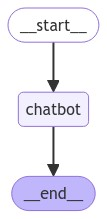

In [32]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [34]:
while True:
  user_input = input("User ")
  if user_input.lower() in ["quit"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant", value["messages"].content)


User Hi
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.2e-07, 'queue_time': 0.01446078, 'total_time': 0.027273047}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-a4e6bd4e-e10d-406b-800d-745e3e13ed70-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋  How can I help you today? 😊\n' response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.2e-07, 'queue_time': 0.01446078, 'total_time': 0.027273047}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-a4e6bd4e-e10d-406b-800d-745e3e13ed70-0' usage_metadata={'input_tokens'